In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df0 = pd.read_csv("cleaned_df_5_31.csv")

In [2]:
def score_by_group(df):
    tl = len(df)
    indices = list(df.index.unique())
    strain = indices[:int(tl*0.7)]
    
    svalid = indices[int(tl*0.9):] + indices[int(tl*0.7):int(tl*0.8)]
    stest = indices[int(tl*0.8):int(tl*0.9)]
    df.loc[df.index.isin(strain), "group"] = 0
    df.loc[df.index.isin(svalid), "group"] = 1
    df.loc[df.index.isin(stest), "group"] = 2

    df.loc[df.ADAS11<=12, "diag"] = 0
    df.loc[(df.ADAS11>12)&(df.ADAS11<=18), "diag"] = 1
    df.loc[df.ADAS11>18, "diag"] = 2

    df_train = df.loc[df.group==0]
    df_valid = df.loc[df.group==1]
    df_test = df.loc[df.group==2]

    print(r2_score(df_train.ADAS11, df_train.pred), len(df_train))
    print(r2_score(df_valid.ADAS11, df_valid.pred), len(df_valid), len(svalid))
    print(r2_score(df_test.ADAS11, df_test.pred), len(df_test))
    return df.copy()

In [11]:
dfa = pd.read_csv("ADNIMERGE.csv")

/home/madar/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (18,19,20,103,104) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = pd.read_csv("baseline_results_0318.csv").copy()

In [5]:
r2_score(df.pred, df.ADAS11_bl)

0.8679130998907352

In [4]:
df

,Unnamed: 0,PTID,ADAS11,ADAS11_bl,Years_bl,Month_bl,Month,M,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,pred,group,diag
0,0,011_S_0002,10.67,10.67,0.0,0.0,0,0.0,74.3,Male,16,Not Hisp/Latino,White,Married,10.538240,0.0,0.0
1,1,011_S_0003,22.00,22.00,0.0,0.0,0,0.0,81.3,Male,18,Not Hisp/Latino,White,Married,22.000000,0.0,2.0
2,5,022_S_0004,14.33,14.33,0.0,0.0,0,0.0,67.5,Male,10,Hisp/Latino,White,Married,14.330000,0.0,1.0
3,10,011_S_0005,8.67,8.67,0.0,0.0,0,0.0,73.7,Male,16,Not Hisp/Latino,White,Married,9.247459,0.0,0.0
4,15,100_S_0006,18.67,18.67,0.0,0.0,0,0.0,80.4,Female,13,Not Hisp/Latino,White,Married,17.716068,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,13826,019_S_6668,13.00,13.00,0.0,0.0,0,0.0,75.6,Female,15,Not Hisp/Latino,White,Widowed,12.242930,1.0,1.0
1586,13847,126_S_6683,26.00,26.00,0.0,0.0,0,0.0,66.7,Male,15,Not Hisp/Latino,White,Married,27.879566,1.0,2.0
1587,13850,168_S_6634,19.33,19.33,0.0,0.0,0,0.0,80.3,Female,16,Not Hisp/Latino,White,Married,18.693812,1.0,2.0
1588,13903,131_S_6616,11.33,11.33,0.0,0.0,0,0.0,78.6,Male,18,Not Hisp/Latino,White,Married,11.668171,1.0,0.0


In [5]:
train1 = df.head(990).copy()
test1 = df.tail(488).copy()
val1 = df.iloc[990:1102].copy()

In [6]:
val1.shape[0], train1.shape[0], test1.shape[0]

(112, 990, 488)

In [8]:
df01 = test1.copy()

print(df01.loc[df01.PTGENDER=="Female"].shape[0])
print(df01.loc[df01.PTGENDER=="Male"].shape[0])
print(df01.loc[df01.PTMARRY=="Married"].shape[0])
print(df01.loc[df01.PTMARRY=="Divorced"].shape[0])
print(df01.loc[~((df01.PTMARRY=="Married")|(df01.PTMARRY=="Divorced"))].shape[0])
print(df01.describe())

235
253
360
45
83
         Unnamed: 0      ADAS11   ADAS11_bl  Years_bl  Month_bl  Month      M  \
count    488.000000  488.000000  488.000000     488.0     488.0  488.0  488.0   
mean   10557.653689    9.467152    9.467152       0.0       0.0    0.0    0.0   
std     2240.724460    5.523750    5.523750       0.0       0.0    0.0    0.0   
min     7054.000000    1.000000    1.000000       0.0       0.0    0.0    0.0   
25%     8400.000000    5.670000    5.670000       0.0       0.0    0.0    0.0   
50%    11424.000000    8.000000    8.000000       0.0       0.0    0.0    0.0   
75%    12689.750000   12.000000   12.000000       0.0       0.0    0.0    0.0   
max    13909.000000   42.670000   42.670000       0.0       0.0    0.0    0.0   

              AGE    PTEDUCAT        pred       group        diag  
count  488.000000  488.000000  488.000000  488.000000  488.000000  
mean    73.075205   16.180328    9.257995    1.303279    0.303279  
std      7.434556    2.779409    5.910011    0.5

In [13]:
list(dfa.columns)

['RID',
 'PTID',
 'VISCODE',
 'SITE',
 'COLPROT',
 'ORIGPROT',
 'EXAMDATE',
 'DX_bl',
 'AGE',
 'PTGENDER',
 'PTEDUCAT',
 'PTETHCAT',
 'PTRACCAT',
 'PTMARRY',
 'APOE4',
 'FDG',
 'PIB',
 'AV45',
 'ABETA',
 'TAU',
 'PTAU',
 'CDRSB',
 'ADAS11',
 'ADAS13',
 'ADASQ4',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'LDELTOTAL',
 'DIGITSCOR',
 'TRABSCOR',
 'FAQ',
 'MOCA',
 'EcogPtMem',
 'EcogPtLang',
 'EcogPtVisspat',
 'EcogPtPlan',
 'EcogPtOrgan',
 'EcogPtDivatt',
 'EcogPtTotal',
 'EcogSPMem',
 'EcogSPLang',
 'EcogSPVisspat',
 'EcogSPPlan',
 'EcogSPOrgan',
 'EcogSPDivatt',
 'EcogSPTotal',
 'FLDSTRENG',
 'FSVERSION',
 'IMAGEUID',
 'Ventricles',
 'Hippocampus',
 'WholeBrain',
 'Entorhinal',
 'Fusiform',
 'MidTemp',
 'ICV',
 'DX',
 'mPACCdigit',
 'mPACCtrailsB',
 'EXAMDATE_bl',
 'CDRSB_bl',
 'ADAS11_bl',
 'ADAS13_bl',
 'ADASQ4_bl',
 'MMSE_bl',
 'RAVLT_immediate_bl',
 'RAVLT_learning_bl',
 'RAVLT_forgetting_bl',
 'RAVLT_perc_forgetting_bl',
 'LDELT

In [14]:
c = ["PTID", "ADAS11", 'ADAS11_bl', 'Years_bl',
 'Month_bl','Month','M', 'AGE','PTGENDER','PTEDUCAT','PTETHCAT','PTRACCAT','PTMARRY']

In [15]:
dfc = dfa[c].copy()

In [27]:
len(dfc)

15207

In [16]:
dfa.PTID.nunique()

2299

In [17]:
# clean all dfc
dfc = dfc.loc[(~dfc.ADAS11.isna())&(dfc.ADAS11!=0)&(dfc.ADAS11_bl!=0)]
# dfc = dfc.loc[dfc.Month.isin([0, 6, 12, 24, 36, 48])]

In [18]:
dfc

,PTID,ADAS11,ADAS11_bl,Years_bl,Month_bl,Month,M,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY
0,011_S_0002,10.67,10.67,0.000000,0.00000,0,0.0,74.3,Male,16,Not Hisp/Latino,White,Married
1,011_S_0003,22.00,22.00,0.000000,0.00000,0,0.0,81.3,Male,18,Not Hisp/Latino,White,Married
2,011_S_0003,19.00,22.00,0.498289,5.96721,6,6.0,81.3,Male,18,Not Hisp/Latino,White,Married
3,011_S_0003,24.00,22.00,0.999316,11.96720,12,12.0,81.3,Male,18,Not Hisp/Latino,White,Married
4,011_S_0003,25.67,22.00,1.998630,23.93440,24,24.0,81.3,Male,18,Not Hisp/Latino,White,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15196,020_S_6901,9.67,9.67,0.000000,0.00000,0,0.0,71.7,Female,14,Not Hisp/Latino,White,Married
15197,941_S_6854,18.67,19.00,1.032170,12.36070,12,12.0,86.2,Male,18,Not Hisp/Latino,White,Married
15201,137_S_6883,7.33,7.33,0.000000,0.00000,0,0.0,64.5,Female,18,Not Hisp/Latino,White,Divorced
15203,052_S_6832,18.33,14.67,1.180010,14.13110,12,12.0,NaN,Male,18,Not Hisp/Latino,White,Married


In [19]:
dfc.sort_values(by=["PTID", "Month"])

,PTID,ADAS11,ADAS11_bl,Years_bl,Month_bl,Month,M,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY
669,002_S_0295,3.00,3.00,0.00000,0.00000,0,0.0,84.8,Male,18,Not Hisp/Latino,White,Married
670,002_S_0295,5.33,3.00,0.48460,5.80328,6,6.0,84.8,Male,18,Not Hisp/Latino,White,Married
671,002_S_0295,4.67,3.00,1.04312,12.49180,12,12.0,84.8,Male,18,Not Hisp/Latino,White,Married
672,002_S_0295,3.67,3.00,2.23956,26.81970,24,24.0,84.8,Male,18,Not Hisp/Latino,White,Married
673,002_S_0295,3.67,3.00,2.99521,35.86890,36,36.0,84.8,Male,18,Not Hisp/Latino,White,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13562,941_S_6581,7.33,7.33,0.00000,0.00000,0,0.0,74.4,Female,16,Not Hisp/Latino,White,Widowed
14964,941_S_6581,11.33,7.33,1.97673,23.67210,24,24.0,74.4,Female,16,Not Hisp/Latino,White,Widowed
14414,941_S_6803,22.67,22.67,0.00000,0.00000,0,0.0,75.0,Female,12,Not Hisp/Latino,White,Married
14672,941_S_6854,19.00,19.00,0.00000,0.00000,0,0.0,86.2,Male,18,Not Hisp/Latino,White,Married


In [20]:
dfd = dfc.groupby("PTID").agg({"Month":["min", "max", "count"],"ADAS11":["first", "last"]}).reset_index()

In [21]:
dfd.columns= ["ptid", "month_bl", "month_max", "ct", "adas_first", "adas_last"]

In [22]:
dfd

,ptid,month_bl,month_max,ct,adas_first,adas_last
0,002_S_0295,0,72,8,3.00,6.00
1,002_S_0413,0,162,13,3.33,9.00
2,002_S_0559,0,36,5,6.00,4.67
3,002_S_0619,0,24,4,19.33,28.67
4,002_S_0685,0,72,8,3.67,4.00
...,...,...,...,...,...,...
2283,941_S_6575,0,24,3,10.00,9.67
2284,941_S_6580,0,24,3,13.33,9.00
2285,941_S_6581,0,24,2,7.33,11.33
2286,941_S_6803,0,0,1,22.67,22.67


In [27]:
dfe = dfd.loc[dfd.ct>1].copy()

In [28]:
dfe.loc[:, "alpha"] = (np.log(dfe["adas_last"])-np.log(dfe["adas_first"]))/(dfe["month_max"]-dfe["month_bl"])

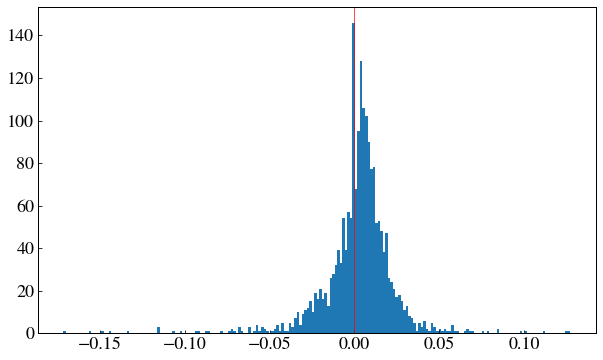

In [29]:
plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.facecolor": 'white',  # Background color to white
    "axes.facecolor": 'white',    # Background color to white
    "axes.edgecolor": 'black',    # Border color
    "axes.linewidth": 1.0         # Border width
})
plt.rcParams["figure.figsize"] = (10, 6)

plt.hist(dfe.alpha, bins=200)
plt.axvline(x=0, color='red', linestyle='-', ymax=20, linewidth=0.7)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, top=False,
                left=True, right=False, labelbottom=True, labelleft=True)
plt.savefig("S_Alpha.eps", dpi=600, bbox_inches='tight', pad_inches=0)

In [30]:
gd = np.random.gamma(shape=0.2, size=1952)

In [31]:
gn = np.random.normal(0.01, 0.15, 1952)

In [32]:
dfe.loc[:, "mod"] = gn/20

In [33]:
dfe.loc[:, "fpred"] = dfe["mod"] + dfe["alpha"]

In [34]:
dfe

,ptid,month_bl,month_max,ct,adas_first,adas_last,alpha,mod,fpred
0,002_S_0295,0,72,8,3.00,6.00,0.009627,-0.003675,0.005952
1,002_S_0413,0,162,13,3.33,9.00,0.006137,0.004171,0.010309
2,002_S_0559,0,36,5,6.00,4.67,-0.006961,0.011297,0.004336
3,002_S_0619,0,24,4,19.33,28.67,0.016425,-0.000188,0.016236
4,002_S_0685,0,72,8,3.67,4.00,0.001196,0.006986,0.008182
...,...,...,...,...,...,...,...,...,...
2282,941_S_6574,0,24,2,10.67,9.00,-0.007092,0.001412,-0.005680
2283,941_S_6575,0,24,3,10.00,9.67,-0.001398,-0.003694,-0.005092
2284,941_S_6580,0,24,3,13.33,9.00,-0.016366,0.016334,-0.000032
2285,941_S_6581,0,24,2,7.33,11.33,0.018145,0.006911,0.025056


In [35]:
r2_score(dfe["alpha"], dfe["fpred"])

0.8713607904919671

In [36]:
dfe.to_csv('uncompleted.csv')

In [26]:
import seaborn as sns

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8739253798616096


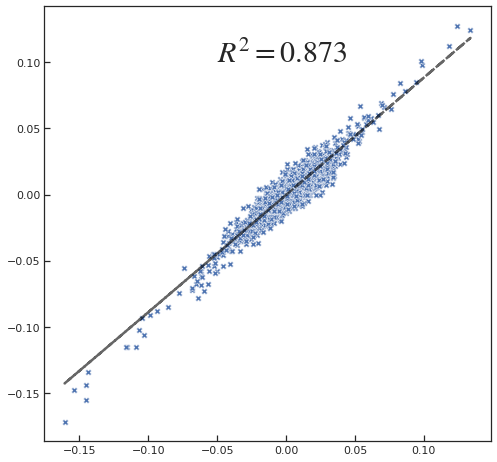

In [110]:
sns.set(style="white", rc={"figure.figsize": (8, 8)})
x = dfe['fpred'].astype(float).values
y = dfe['alpha'].astype(float).values
a, b = np.polyfit(x, y, 1)
print(r2_score(y, x))
sns.scatterplot(data=dfe, x='fpred',
                y='alpha', marker="X", legend=None)


# plt.title("LoganVT of PBIF against AIF", fontsize=20)
plt.annotate(r"$R^2 = {0.873}$",(-0.05,0.1), fontsize=30)
# plt.xlim(0, 10.5)
# plt.ylim(0, 10.5)
plt.plot(x, a*x+b, color='black', linestyle='--', linewidth=2.5, alpha=0.6)

plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='both', which='both', direction='in', bottom=True,
                top=False, left=True, right=False, labelbottom=True, labelleft=True)
plt.savefig("Alpha_Pred.eps", dpi=600, bbox_inches='tight', pad_inches=0)


In [301]:
# list_of_ptid = dfd.loc[dfd.ct>=3].ptid.unique()

In [35]:
# len(dfd.loc[dfd.ct>=3].ptid.unique())

1625

In [303]:
dfc = dfc.loc[dfc.PTID.isin(list_of_ptid)]

In [304]:
dfc = dfc.loc[~dfc.ADAS11_bl.isna()]

In [158]:
1590

In [305]:
dfd.loc[:, "ratio"] = (dfd.adas_max - dfd.adas_min) / (dfd.month_max - dfd.month_bl)
dfd = dfd.loc[dfd.ct>=3]

In [306]:
dfe = pd.merge(dfc, dfd, left_on=["PTID"], right_on=["ptid"], how="inner")

In [307]:
lg = len(dfe)
zt = np.random.rand(lg)
zp = np.random.choice([ -0.5, 0.5, -0.3, 0.3, -0.1, 0.1, -0.05, 0.05], lg)
zf = zt * zp
ztmp = 1 + zf/(np.abs(zf)+4.5)

In [311]:
dfe.loc[:, "modifier"] = ztmp
dfe.loc[:, "base_pred"] = dfe.ADAS11_bl * (1+zf)
dfe.loc[:,"pred"] = dfe.base_pred + (dfe.modifier*dfe.ratio*dfe.Month*0.94)
r2_score(dfe.ADAS11, dfe.pred)

0.6794690731386642

In [314]:
tl = dfe.PTID.nunique()

In [ ]:
int(lg*0.7)

In [315]:
strain = dfe.PTID.unique()[:int(tl*0.7)]
svalid = dfe.PTID.unique()[int(tl*0.7):int(tl*0.9)]
stest = dfe.PTID.unique()[int(tl*0.9):]

dfe.loc[dfe.PTID.isin(strain), "group"] = 0
dfe.loc[dfe.PTID.isin(svalid), "group"] = 1
dfe.loc[dfe.PTID.isin(stest), "group"] = 2

dfe.loc[dfe.ADAS11<=12, "diag"] = 0
dfe.loc[(dfe.ADAS11>12)&(dfe.ADAS11<=18), "diag"] = 1
dfe.loc[dfe.ADAS11>18, "diag"] = 2

df_train = dfe.loc[dfe.group==0]
df_test = dfe.loc[dfe.group==2]
df_valid = dfe.loc[dfe.group==1]

print(r2_score(df_train.ADAS11, df_train.pred))
print(r2_score(df_valid.ADAS11, df_valid.pred))
print(r2_score(df_test.ADAS11, df_test.pred))

0.7002508742040494
0.5629679170484341
0.5017651658223513


In [440]:
df_valid.columns

Index(['PTID', 'ADAS11', 'ADAS11_bl', 'Years_bl', 'Month_bl', 'Month', 'M',
       'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY',
       'ptid', 'month_bl', 'month_max', 'ct', 'adas_min', 'adas_max', 'ratio',
       'modifier', 'base_pred', 'pred', 'group', 'diag'],
      dtype='object')

In [439]:
df_valid.loc[df_valid.ADAS11>=21]

,PTID,ADAS11,ADAS11_bl,Years_bl,Month_bl,Month,M,AGE,PTGENDER,PTEDUCAT,...,month_max,ct,adas_min,adas_max,ratio,modifier,base_pred,pred,group,diag
5202,141_S_0697,23.00,15.67,0.977413,11.70490,12,12.0,86.8,Male,17,...,24,3,15.67,23.00,0.305417,0.953799,12.254365,15.540300,1.0,2.0
5203,141_S_0697,21.67,15.67,2.195760,26.29510,24,24.0,86.8,Male,17,...,24,3,15.67,23.00,0.305417,0.947238,11.742223,18.268880,1.0,2.0
5211,114_S_4379,23.00,17.00,0.791239,9.47541,12,6.0,87.8,Female,12,...,12,3,17.00,23.00,0.500000,0.997973,16.844610,22.473177,1.0,2.0
5225,116_S_0752,25.00,17.33,3.008900,36.03280,36,36.0,82.0,Female,16,...,48,6,14.67,30.00,0.319375,1.026424,19.446595,30.539825,1.0,2.0
5226,116_S_0752,30.00,17.33,3.986310,47.73770,48,48.0,82.0,Female,16,...,48,6,14.67,30.00,0.319375,0.993271,16.801704,31.114942,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6261,031_S_0294,22.67,13.00,3.014370,36.09840,36,36.0,79.2,Male,16,...,48,6,11.67,22.67,0.229167,1.097176,19.296653,27.805250,1.0,2.0
6269,027_S_0404,22.00,14.67,0.517454,6.19672,6,6.0,87.8,Female,14,...,24,4,14.67,23.67,0.375000,1.064793,19.243628,21.495664,1.0,2.0
6271,027_S_0404,23.67,14.67,2.001370,23.96720,24,24.0,87.8,Female,14,...,24,4,14.67,23.67,0.375000,1.056812,18.646324,27.586951,1.0,2.0
6627,012_S_4094,21.00,16.00,3.028060,36.26230,36,36.0,60.0,Female,12,...,48,6,9.00,22.00,0.270833,0.945343,11.837183,20.501254,1.0,2.0


In [323]:
dfe.to_csv("time_series_results.csv")

In [9]:
dfe = pd.read_csv("time_series_results.csv")

In [10]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [12]:
dfe.columns

Index(['Unnamed: 0', 'PTID', 'ADAS11', 'ADAS11_bl', 'Years_bl', 'Month_bl',
       'Month', 'M', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'ptid', 'month_bl', 'month_max', 'ct', 'adas_min',
       'adas_max', 'ratio', 'modifier', 'base_pred', 'pred', 'group', 'diag'],
      dtype='object')

(array([ 44.,  80., 141., 241., 319., 408., 484., 408., 586., 447., 368.,
        439., 324., 527., 319., 293., 205., 321., 140., 126., 168., 118.,
         62., 103.,  29.,  72.,  51.,  29.,  57.,  41.,  32.,  41.,  21.,
         29.,  17.,  13.,  33.,   4.,   7.,   6.,   4.,   6.,  19.,   7.,
          3.,   4.,   9.,  10.,   3.,   3.,   0.,   0.,   3.,   0.,   5.,
          4.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   3.,  12.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([0.00198563, 0.00351845, 0.00505128, 0.00658411, 0.00811693,
        0.00964976, 0.01118258, 0.01271541, 0.01424823, 0.01578106,
        0.01731389, 0.01884671, 0.02037954, 0.02191236, 0.02344519,
        0.02497801, 0.02651084, 0.02804367, 0.02957649, 0.03110932,
        0.03264214, 0.03417497, 0.0357078 , 0.

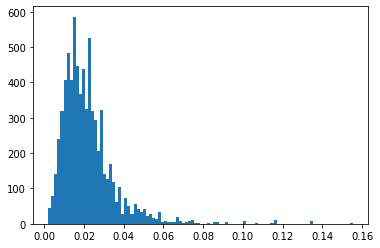

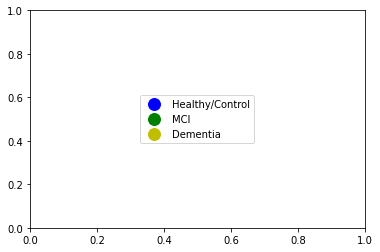

In [24]:
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Healthy/Control',
                          markerfacecolor='b', markersize=14),
                   Line2D([0], [0], marker='o', color='w', label='MCI',
                          markerfacecolor='g', markersize=14),
                   Line2D([0], [0], marker='o', color='w', label='Dementia',
                          markerfacecolor='y', markersize=14),]

# Create the figure
fig, ax = plt.subplots()

ax.legend(handles=legend_elements, loc='center')
fig.show()

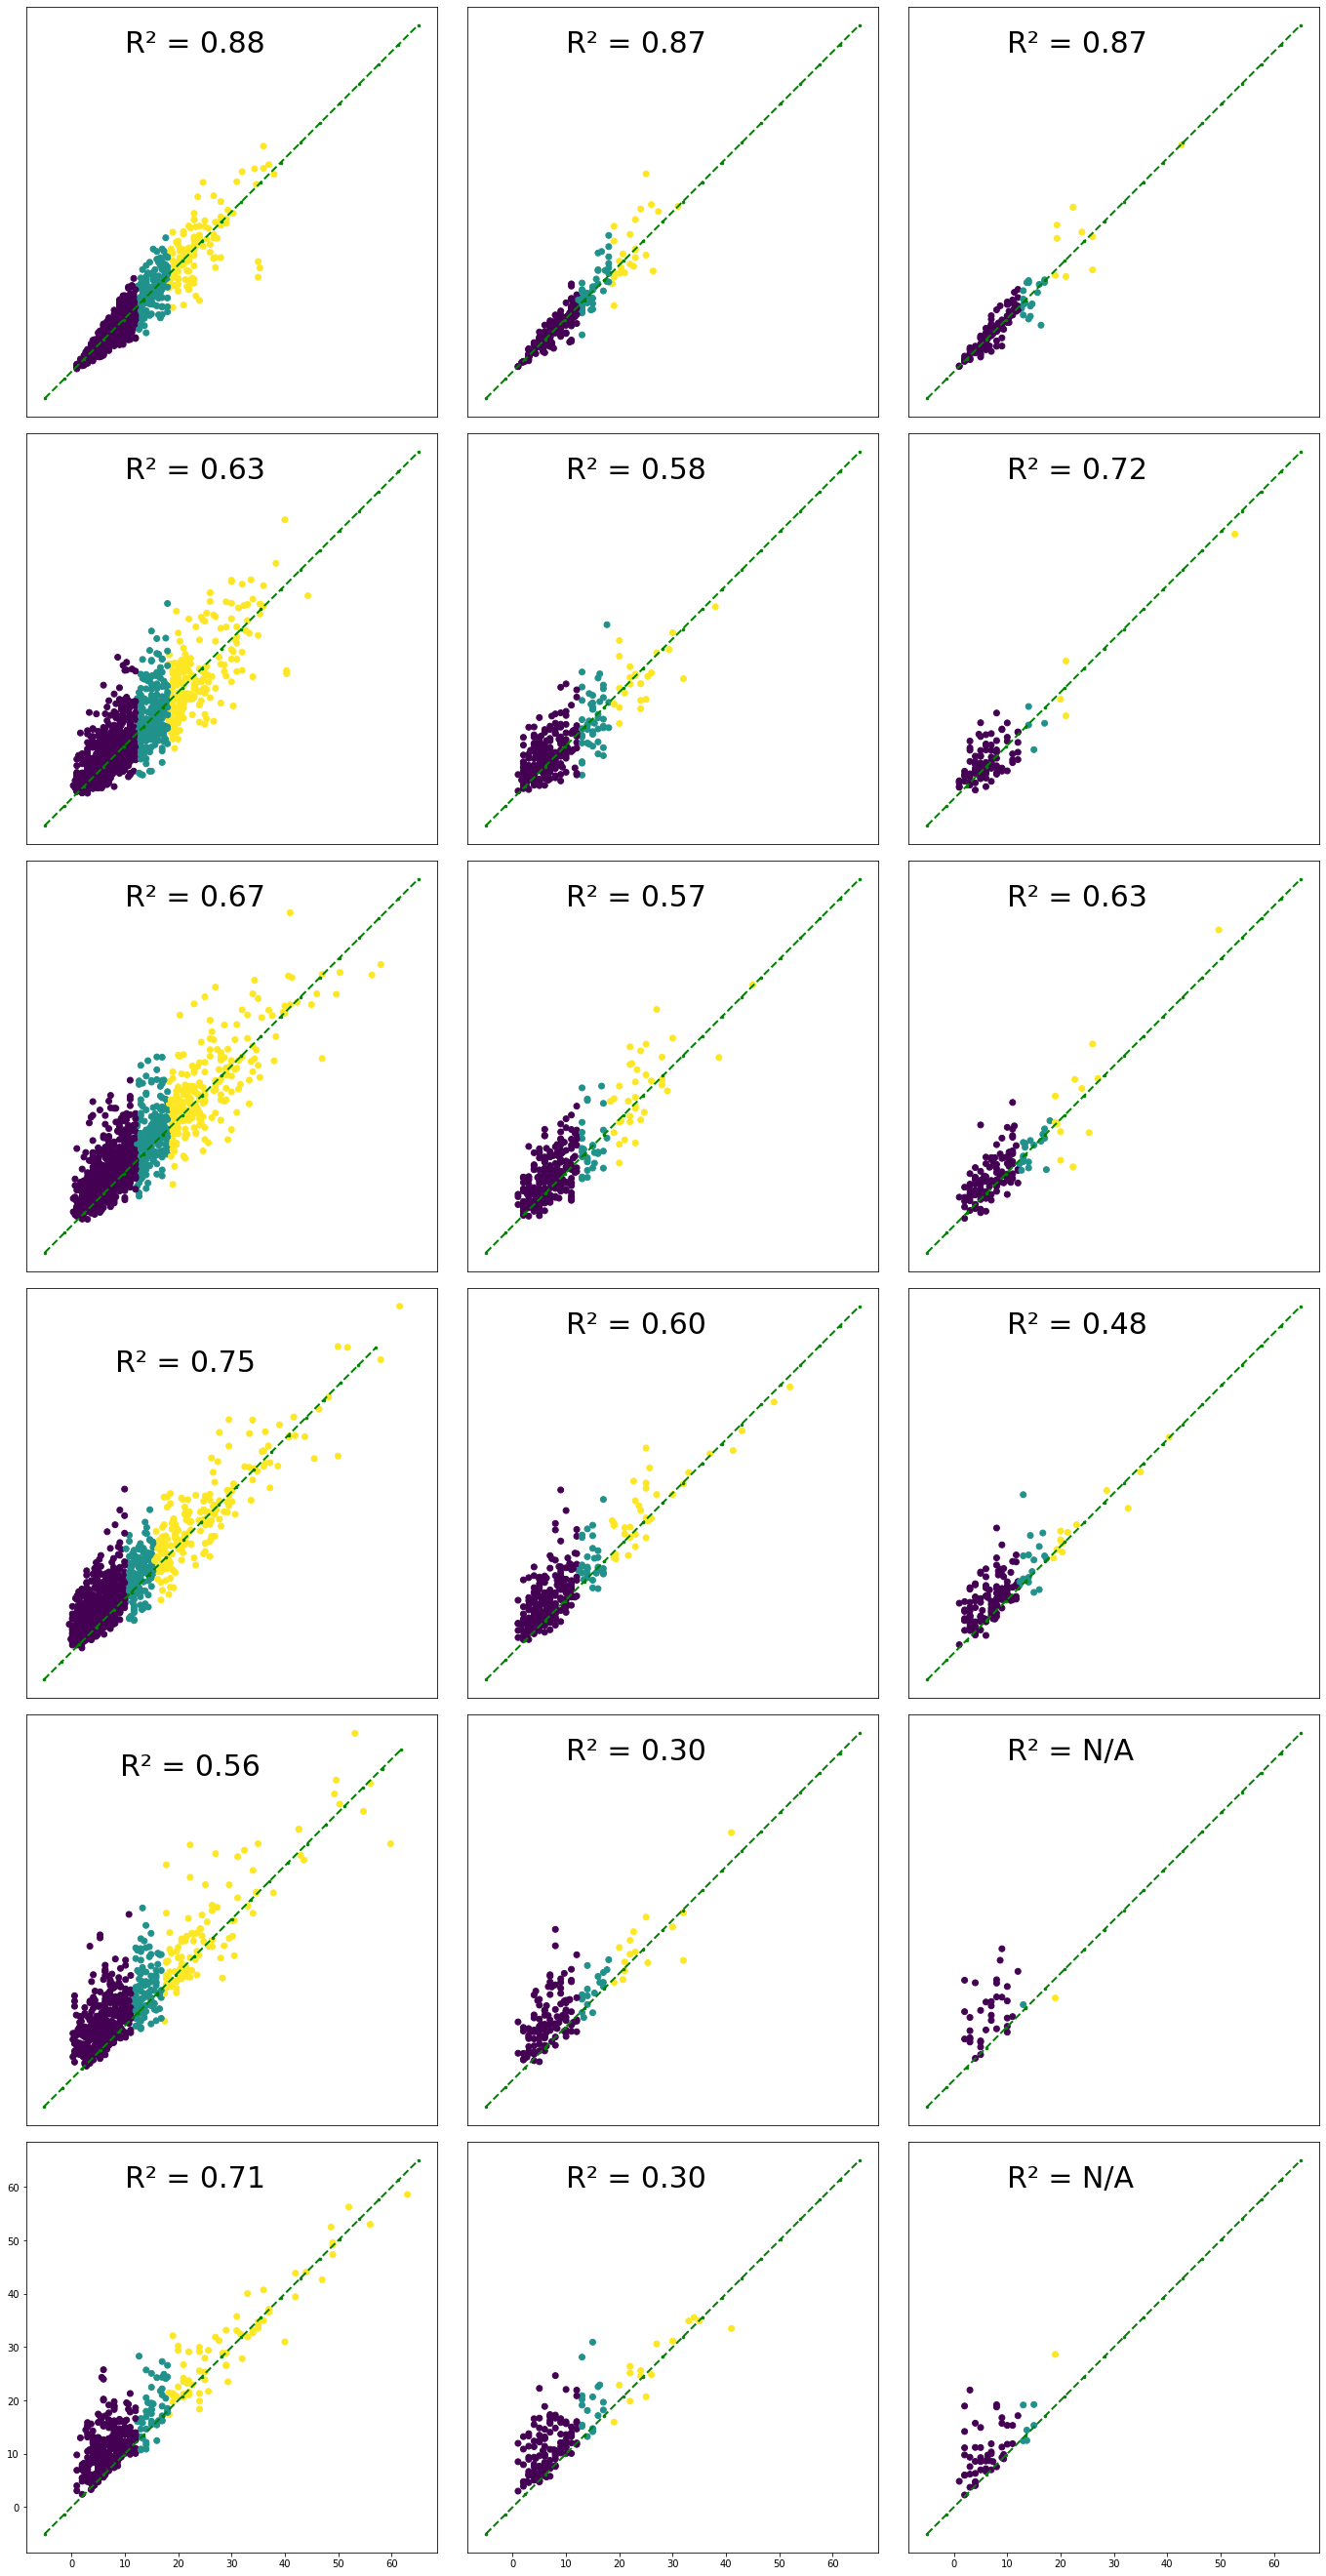

In [9]:
fig, ax = plt.subplots(6, 3, figsize=(24, 48))
plt.subplots_adjust(wspace=0.04, hspace=0.04)
for k in range(3):
    dft = dfe.loc[dfe.group == k]
    set_name = ["Train", "Valid", "Test"][k]
    for i, month in zip(range(6), [0, 6, 12, 24, 36, 48]):
        
        df_tmp = dft.loc[dft.Month==month]
        tmp_y = df_tmp.ADAS11
        tmp_pred = df_tmp.pred
        ax[i][k].scatter(tmp_y, tmp_pred, c=df_tmp.diag)
        if len(tmp_y):
            R_2 = r2_score(tmp_y, tmp_pred)
        else:
            R_2 = 0
        if R_2 > 0:
            ax[i][k].text(10, 60, f'R² = {R_2:.2f}', fontsize = 30)
        else:
            ax[i][k].text(10, 60, f'R² = N/A', fontsize = 30)

#         ax[i][k].set_title(f"{set_name} Set: Month = {month}; R2 = {R_2}")
        # ax[1].set_xticks(np.arange(-0.5, 1.25, step=0.25))
        # ax[1].set_yticks(np.arange(-0.5, 1.25, step=0.25))
#         if i == 5:
#             ax[i][k].set_xlabel("ADAS 11 Ground Truth", fontsize=20)
#             ax[i][k].set_ylabel("ADAS 11 Predictions", fontsize=20)
        if i!=5:
            ax[i][k].axes.xaxis.set_ticks([])
            ax[i][k].axes.yaxis.set_ticks([])
        if (i==5) & (k!=0):
            ax[i][k].axes.yaxis.set_ticks([])

        ax[i][k].plot(np.linspace(-5, 65, 20), np.linspace(-5, 65, 20), color='green', marker='.', linestyle='dashed',
             linewidth=2, markersize=5)
        ax[i][k].axis('square')
# ax[5][2].legend(handles=legend_elements, loc='lower right')
# ax[0][0].set_title("Training Sets", fontsize=50)
# ax[0][1].set_title("Validation Sets", fontsize=50)
# ax[0][2].set_title("Testing Sets", fontsize=20)


# ax[5][0].set_xlabel("ADAS 11 Ground Truth", fontsize=20)
# ax[5][1].set_xlabel("ADAS 11 Ground Truth", fontsize=20)
# ax[5][2].set_xlabel("ADAS 11 Ground Truth", fontsize=20)
# ax[0][0].set_ylabel("Month = 0", fontsize=20)
# ax[1][0].set_ylabel("Month = 6", fontsize=20)
# ax[2][0].set_ylabel("Month = 12", fontsize=20)
# ax[3][0].set_ylabel("Month = 24", fontsize=20)
# ax[4][0].set_ylabel("Month = 36", fontsize=20)
# ax[5][0].set_ylabel("Month = 48", fontsize=20)
fig.show()
plt.savefig("0515_TS_Results_in_Months_Full")

In [13]:
print("²")

²


In [21]:
dfe.head(20)

,Unnamed: 0,PTID,ADAS11,ADAS11_bl,Years_bl,Month_bl,Month,M,AGE,PTGENDER,...,month_max,ct,adas_min,adas_max,ratio,modifier,base_pred,pred,group,diag
0,0,011_S_0002,10.67,10.67,0.000000,0.00000,0,0.0,74.3,Male,...,36,3,10.67,12.00,0.036944,1.045147,12.940201,12.940201,0.0,0.0
1,1,011_S_0002,10.67,10.67,0.490075,5.86885,6,6.0,74.3,Male,...,36,3,10.67,12.00,0.036944,0.991310,10.249085,10.455641,0.0,0.0
2,2,011_S_0002,12.00,10.67,2.967830,35.54100,36,36.0,74.3,Male,...,36,3,10.67,12.00,0.036944,1.047109,13.043744,14.352839,0.0,0.0
3,3,011_S_0003,22.00,22.00,0.000000,0.00000,0,0.0,81.3,Male,...,24,4,19.00,25.67,0.277917,0.969073,18.840561,18.840561,0.0,2.0
4,4,011_S_0003,19.00,22.00,0.498289,5.96721,6,6.0,81.3,Male,...,24,4,19.00,25.67,0.277917,1.001852,22.183694,23.754047,0.0,2.0
5,5,011_S_0003,24.00,22.00,0.999316,11.96720,12,12.0,81.3,Male,...,24,4,19.00,25.67,0.277917,1.011930,23.195357,26.367657,0.0,2.0
6,6,011_S_0003,25.67,22.00,1.998630,23.93440,24,24.0,81.3,Male,...,24,4,19.00,25.67,0.277917,1.000054,22.005390,28.275531,0.0,2.0
7,7,022_S_0004,14.33,14.33,0.000000,0.00000,0,0.0,67.5,Male,...,36,4,14.33,18.00,0.101944,0.978807,12.933792,12.933792,0.0,1.0
8,8,022_S_0004,17.33,14.33,0.479124,5.73770,6,6.0,67.5,Male,...,36,4,14.33,18.00,0.101944,0.939543,10.180589,10.720795,0.0,1.0
9,9,022_S_0004,15.00,14.33,1.015740,12.16390,12,12.0,67.5,Male,...,36,4,14.33,18.00,0.101944,1.006231,14.734312,15.891410,0.0,1.0


In [24]:
dfe.loc[:, "linear_pred"] = dfe.adas_min*dfe.modifier+ dfe.M * dfe.ratio

In [25]:
dfe.to_csv("df_with_lienar_preds_0322.csv")

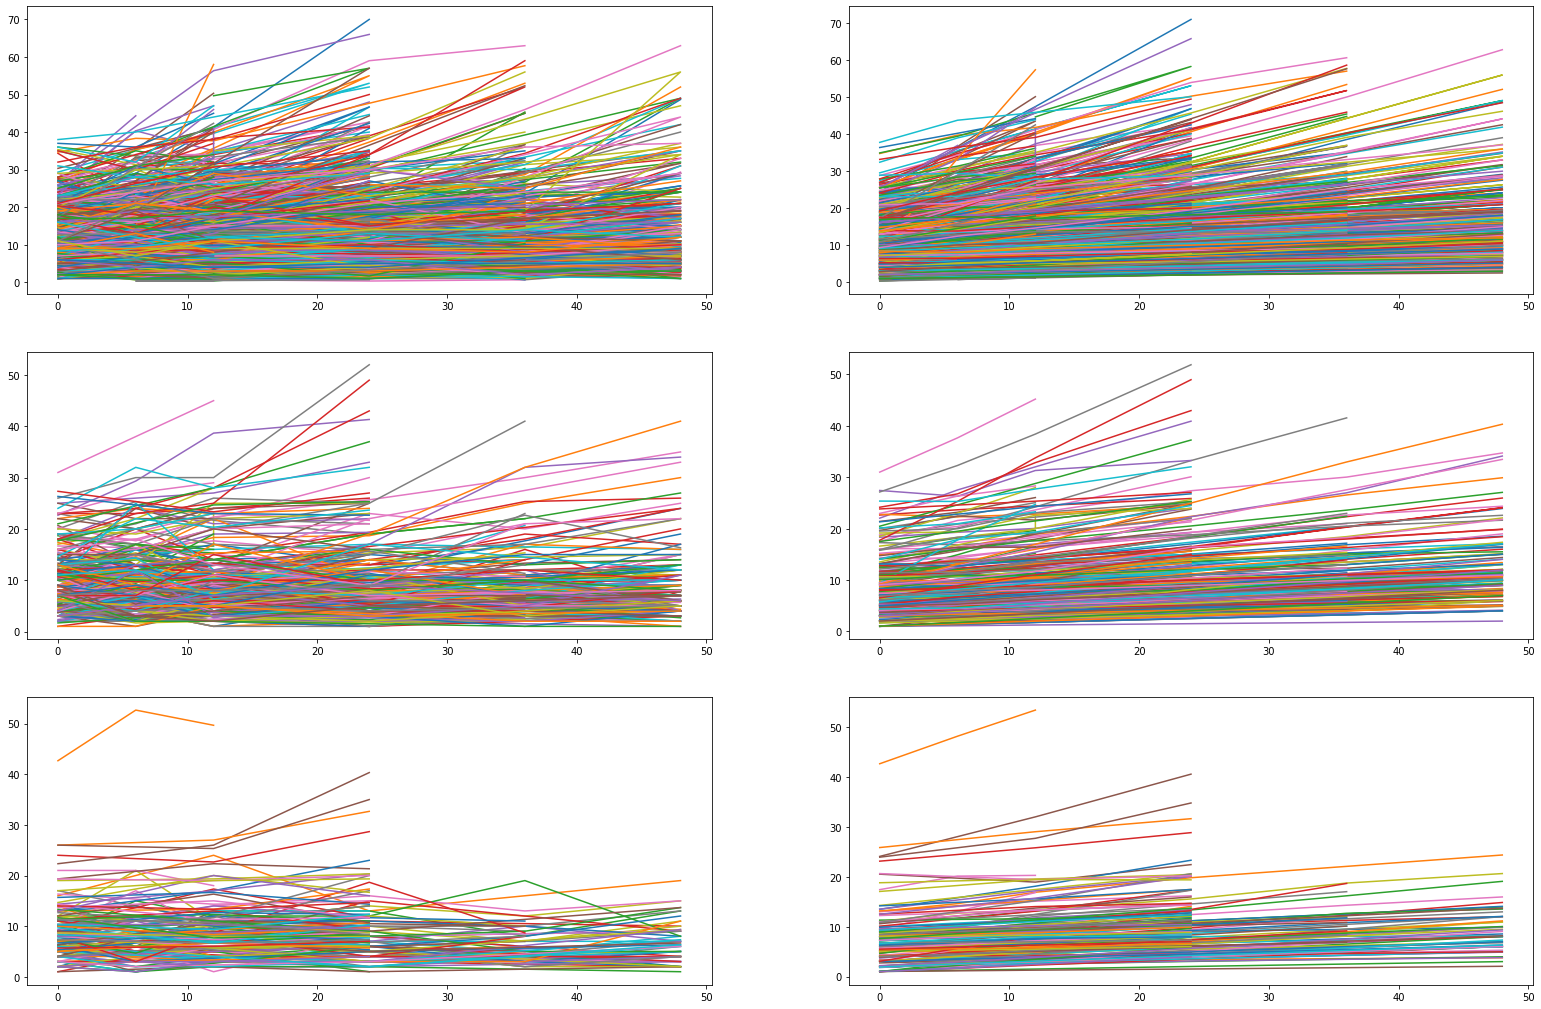

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(27, 18))
df = pd.read_csv("df_with_lienar_preds_0322.csv")
for k in range(3):
    dft = df.loc[df.group==k]
    for i, cat in zip(range(2), ["ADAS11", "pred"]):
    #     group = ["Training", "Validation", "Testing"][i]
        for ptid in dft.PTID.unique():
            df_temp = dft.loc[dft.PTID==ptid]
            if cat == "ADAS11":
                y = df_temp[cat]
            else:
                y = df_temp.adas_min*df_temp.modifier+ df_temp.M * df_temp.ratio
            x = df_temp["Month"]

            ax[k][i].plot(x, y)
#     r2 = r2_score(y, final)
#     ax[i].text(10, 60, f"R² = {r2:.3f}", fontsize=20)
#     ax[i].set_title(f"{group} Set", fontsize=20)
#     ax[i].set_xticks(np.arange(-10, 70, step=10))
#     ax[i].set_xlabel("ADAS 11 Ground Truth", fontsize=12)
#     ax[i].set_ylabel("ADAS 11 Predictions", fontsize=12)
#     ax[i].set_yticks(np.arange(-10, 70, step=10))
#     ax[i].plot(np.linspace(-5, 65, 30), np.linspace(-5, 65, 30), color='green', marker='.', linestyle='dashed',
#          linewidth=1, markersize=2)
#     ax[i].axis('square')

    
# for i in range(3):
#     group = ["Training", "Validation", "Testing"][i]
#     df_temp = df.loc[df.group==i]
#     y = df_temp.ADAS11
#     final = df_temp.pred
#     ax[i].scatter(y, final, c=df_temp.diag, s=16)
#     r2 = r2_score(y, final)
#     ax[i].text(10, 60, f"R² = {r2:.3f}", fontsize=20)
#     ax[i].set_title(f"{group} Set", fontsize=20)
#     ax[i].set_xticks(np.arange(-10, 70, step=10))
#     ax[i].set_xlabel("ADAS 11 Ground Truth", fontsize=12)
#     ax[i].set_ylabel("ADAS 11 Predictions", fontsize=12)
#     ax[i].set_yticks(np.arange(-10, 70, step=10))
#     ax[i].plot(np.linspace(-5, 65, 30), np.linspace(-5, 65, 30), color='green', marker='.', linestyle='dashed',
#          linewidth=1, markersize=2)
#     ax[i].axis('square')
    
fig.show()
plt.savefig("0322_all_in_lines.png")

In [426]:
dfbl = dfc.loc[(dfc.Month==0)&(dfc.ADAS11>2)]
lg = len(dfbl)
zt = np.random.rand(lg)
zp = np.random.randint(-8, 8, lg)
zf = zt * zp
# ztmp = 1 + zf/(np.abs(zf)+4.5)
dfbl.loc[:,"pred"] = dfbl.ADAS11 + zf
r2_score(dfbl.ADAS11, dfbl.pred)

/home/madar/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


0.7994109008090348

In [427]:
dfn = score_by_group(dfbl)

0.8078976059075088 1079
0.7586864782366287 309 309
0.7624346945070538 154


/home/madar/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/madar/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [423]:
# dfn.to_csv("baseline_results_0318.csv")

In [37]:
df.loc[df.group==1].shape
df.loc[df.group==1, "group"] = 3
df.loc[df.group==2, "group"] = 1
df.loc[df.group==3, "group"] = 2
df.loc[(df.group==0)&(df.PTEDUCAT<=12), "group"] = 2

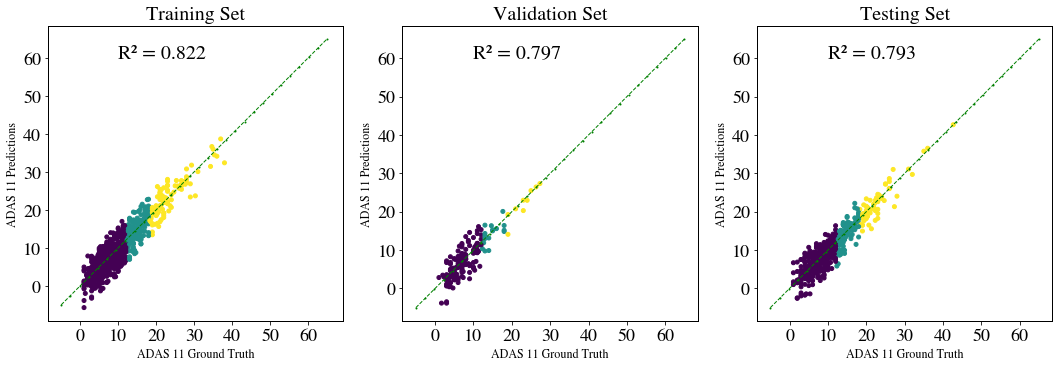

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
df = df.copy()
for i in range(3):
    group = ["Training", "Validation", "Testing"][i]
    df_temp = df.loc[df.group==i]
    y = df_temp.ADAS11
    final = df_temp.pred
    ax[i].scatter(y, final, c=df_temp.diag, s=16)
    r2 = r2_score(y, final)
    if group == "Testing":
        ax[i].text(10, 60, f"R² = {0.793}", fontsize=20)
    elif group == "Training":
        ax[i].text(10, 60, f"R² = {0.822}", fontsize=20)
    else:
        ax[i].text(10, 60, f"R² = {0.797}", fontsize=20)
    ax[i].set_title(f"{group} Set", fontsize=20)
    ax[i].set_xticks(np.arange(-10, 70, step=10))
    ax[i].set_xlabel("ADAS 11 Ground Truth", fontsize=12)
    ax[i].set_ylabel("ADAS 11 Predictions", fontsize=12)
    ax[i].set_yticks(np.arange(-10, 70, step=10))
    ax[i].plot(np.linspace(-5, 65, 30), np.linspace(-5, 65, 30), color='green', marker='.', linestyle='dashed',
         linewidth=1, markersize=2)
    ax[i].axis('square')

fig.show()
plt.savefig("2023Jan_scatter.png")

In [2]:
df = pd.read_csv("cleaned_df_5_31.csv")

In [16]:
len(df)

1643

In [19]:
zt = np.random.rand(1643)

In [28]:
zf = np.random.randint(-1,1,1643)

In [29]:
zf

array([ 0, -1,  0, ...,  0,  0, -1])

In [31]:
df.head()

,AGE,PTEDUCAT,APOE4,ADAS11,MMSE,ABETA_bl,TAU_bl,PTAU_bl,M,filenames,...,DX_bl_CN,DX_bl_EMCI,DX_bl_LMCI,DX_bl_SMC,PTGENDER_Female,PTGENDER_Male,PTGENDER_nan,PTMARRY_Divorced,PTMARRY_Married,PTMARRY_Never married
0,80.4,13,0.0,19.00,21,1002.240126,286.524536,27.657809,6,sub-ADNI100S0006_ses-M06_T1w,...,0,0,1,0,1,0,0,0,1,0
1,80.4,13,0.0,18.67,26,1002.240126,286.524536,27.657809,12,sub-ADNI100S0006_ses-M12_T1w,...,0,0,1,0,1,0,0,0,1,0
2,80.4,13,0.0,11.33,24,1002.240126,286.524536,27.657809,18,sub-ADNI100S0006_ses-M18_T1w,...,0,0,1,0,1,0,0,0,1,0
3,80.4,13,0.0,17.67,22,1002.240126,286.524536,27.657809,36,sub-ADNI100S0006_ses-M36_T1w,...,0,0,1,0,1,0,0,0,1,0
4,80.8,18,1.0,6.67,27,1002.240126,286.524536,27.657809,12,sub-ADNI100S0015_ses-M12_T1w,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df.groupby(["AGE", "PTEDUCAT"])

In [4]:
dft = pd.read_csv("df_time_series.csv")

In [74]:
# psx = reshaped_results[0][:,0,3,2,3]/20
# psy = reshaped_results[0][:,1,3,2,3]
# psy = (psy-1.75)/14

# # tsx = reshaped_results[0][:,0,3,3,2]/20
# tsx = psx
# tsy = (reshaped_results[0][:,1,3,3,2]-5.5)/9

In [7]:
dft.M.max()

36

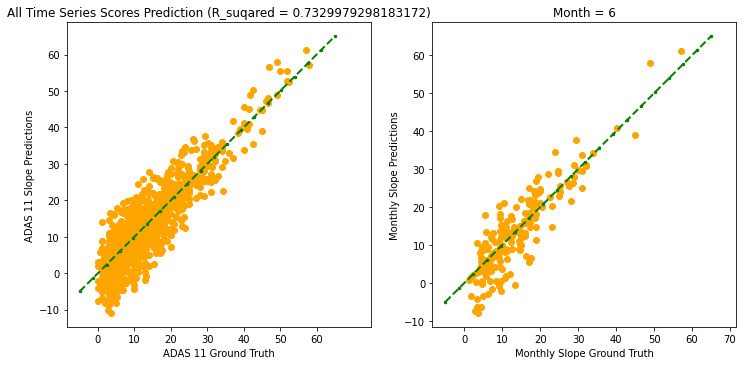

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(y, final, color="orange")
ax[0].set_title("All Time Series Scores Prediction (R_suqared = 0.7329979298183172)")
ax[0].set_xticks(np.arange(-10, 70, step=10))
ax[0].set_xlabel("ADAS 11 Ground Truth")
ax[0].set_ylabel("ADAS 11 Slope Predictions")
ax[0].set_yticks(np.arange(-10, 70, step=10))
ax[0].plot(np.linspace(-5, 65, 20), np.linspace(-5, 65, 20), color='green', marker='.', linestyle='dashed',
     linewidth=2, markersize=5)
ax[0].axis('square')

ax[1].scatter(df6.ADAS11, df6.pred, color="orange")
ax[1].set_title("Month = 6")
# ax[1].set_xticks(np.arange(-0.5, 1.25, step=0.25))
# ax[1].set_yticks(np.arange(-0.5, 1.25, step=0.25))
ax[1].set_xlabel("Monthly Slope Ground Truth")
ax[1].set_ylabel("Monthly Slope Predictions")
ax[].plot(np.linspace(-5, 65, 20), np.linspace(-5, 65, 20), color='green', marker='.', linestyle='dashed',
     linewidth=2, markersize=5)
ax[1].axis('square')
fig.show()
# plt.savefig("TS_Results")

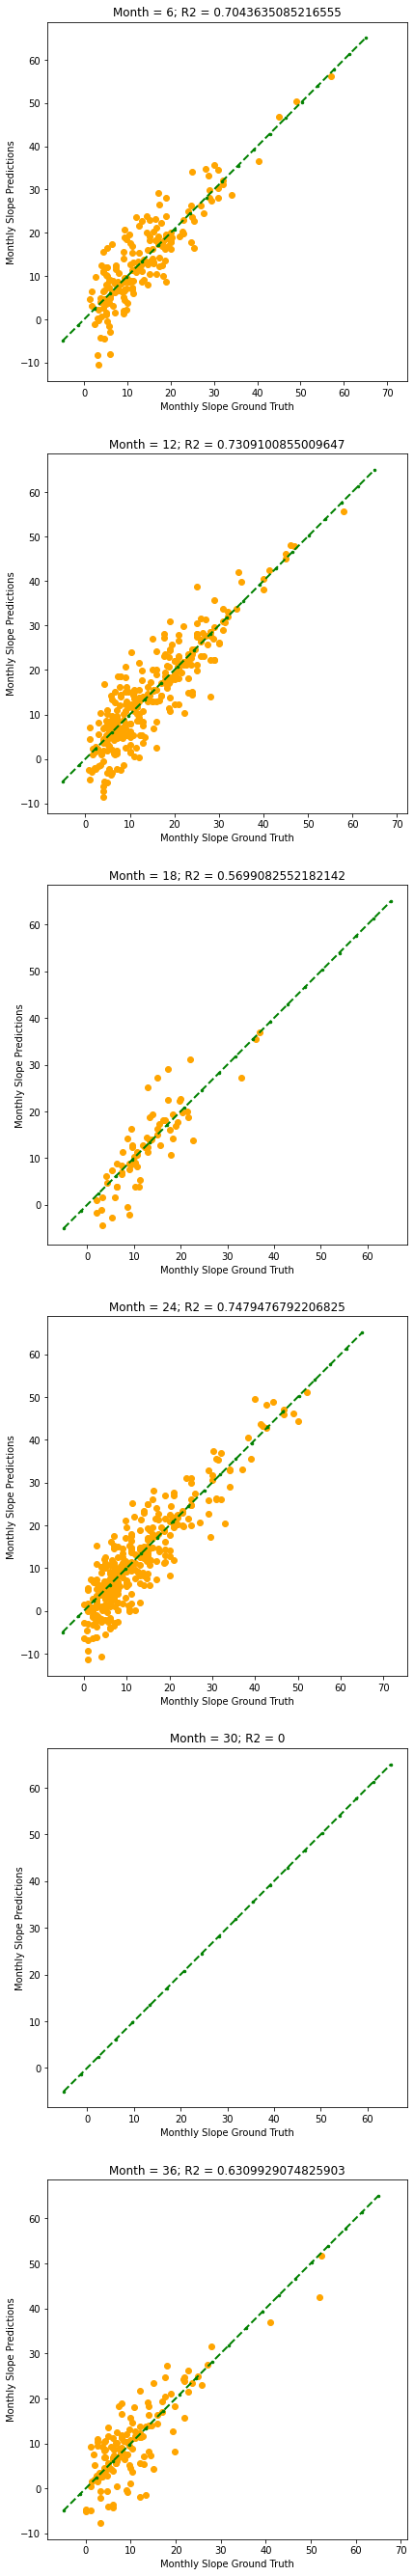

In [17]:
fig, ax = plt.subplots(6, 1, figsize=(8, 48))
for i in range(6):
    
    month = 6 * (i+1)
    df_tmp = dft.loc[dft.M==month]
    tmp_y = df_tmp.ADAS11
    tmp_pred = df_tmp.pred
    ax[i].scatter(tmp_y, tmp_pred, color="orange")
    if len(tmp_y):
        R_2 = r2_score(tmp_y, tmp_pred)
    else:
        R_2 = 0
    ax[i].set_title(f"Month = {month}; R2 = {R_2}")
    # ax[1].set_xticks(np.arange(-0.5, 1.25, step=0.25))
    # ax[1].set_yticks(np.arange(-0.5, 1.25, step=0.25))
    ax[i].set_xlabel("ADAS 11 Ground Truth")
    ax[i].set_ylabel("ADAS 11 Predictions")
    ax[i].plot(np.linspace(-5, 65, 20), np.linspace(-5, 65, 20), color='green', marker='.', linestyle='dashed',
         linewidth=2, markersize=5)
    ax[i].axis('square')
fig.show()
plt.savefig("TS_Results_in_Months")

In [76]:
hf = h5py.File(f'/media/rajlab/sachin_data_1/userdata/daren/feature_map/seg_out0.hdf5','r')
# d = hf[:]
d = hf["seg_out"][:]
hf.close()

In [77]:
d.shape

(5, 4, 128, 128, 128)

In [78]:
x = d[0]

In [79]:
x.shape

(4, 128, 128, 128)

In [80]:
vol = d.argmax(axis=1)

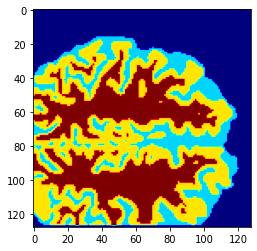

In [88]:
plt.imshow(vol[4][:,:,100], cmap="jet")

In [35]:
d[0][0]

array([[[2.012, 2.805, 2.928, ..., 2.773, 2.367, 1.279],
        [3.055, 3.83 , 3.95 , ..., 3.762, 3.18 , 1.88 ],
        [3.482, 4.66 , 5.066, ..., 4.824, 4.316, 2.826],
        ...,
        [3.486, 4.465, 5.01 , ..., 4.996, 4.336, 2.857],
        [3.309, 4.31 , 5.258, ..., 5.18 , 4.145, 2.83 ],
        [2.188, 3.1  , 3.56 , ..., 3.58 , 3.025, 1.966]],

       [[3.18 , 4.785, 4.7  , ..., 4.777, 4.17 , 2.498],
        [4.258, 5.88 , 5.668, ..., 5.562, 5.027, 3.328],
        [5.027, 6.707, 6.426, ..., 6.008, 5.836, 4.23 ],
        ...,
        [5.2  , 5.867, 5.81 , ..., 5.55 , 5.406, 3.799],
        [5.254, 6.215, 6.883, ..., 6.562, 5.4  , 3.854],
        [3.809, 4.742, 5.145, ..., 4.695, 4.14 , 2.664]],

       [[3.6  , 5.785, 5.895, ..., 5.81 , 5.65 , 3.58 ],
        [4.844, 6.863, 6.742, ..., 6.9  , 6.316, 4.633],
        [5.777, 7.86 , 7.504, ..., 7.633, 7.49 , 5.79 ],
        ...,
        [6.156, 7.06 , 7.062, ..., 6.926, 6.562, 5.152],
        [6.004, 7.246, 7.684, ..., 7.227, 5.9

In [ ]:
plot_volume = vol
# reshaped_volume = reshaped_results[0]
slice_place = plot_volume.shape[-1]//2
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(plot_volume[1,:,:,slice_place],cmap="jet",label="")
ax[1].imshow(plot_volume[1,:,:,slice_place],cmap="gray",label="")
# ax[0].legend()
# ax[1].imshow(plot_volume[2,:,slice_place,:],cmap="twilight",label="")
ax[2].imshow(plot_volume[3,slice_place, :,:],cmap="Accent",label="")
# ax[1].imshow(reshaped_volume[0,0,:,:,slice_place], cmap="jet")
# ax[2].imshow(reshaped_volume[0,1,:,:,slice_place] ,cmap="inferno")
# ax[3].imshow(b2[0,0,slice_place,:,:],cmap="gray")
fig.show()

In [ ]:
# OLD PLOTS.
# fig, ax = plt.subplots(1, 2, figsize=(12,6))
# ax[0].scatter(tsx, tsy, color="orange")
# ax[0].set_title("Baseline Slope Prediction (R_suqared = 0.6915)")
# ax[0].set_xticks(np.arange(-0.5, 1.25, step=0.25))
# ax[0].set_xlabel("Monthly Slope Ground Truth")
# ax[0].set_ylabel("Monthly Slope Predictions")
# ax[0].set_yticks(np.arange(-0.5, 1.25, step=0.25))
# ax[0].plot(np.linspace(-0.25, 0.75, 20), np.linspace(-0.25, 0.75, 20), color='green', marker='.', linestyle='dashed',
#      linewidth=2, markersize=5)
# ax[0].axis('square')

# ax[1].scatter(psx, psy, color="orange")
# ax[1].set_title("Volume-Enhanced Slope Prediction (R_suqared = 0.7738)")
# ax[1].set_xticks(np.arange(-0.5, 1.25, step=0.25))
# ax[1].set_yticks(np.arange(-0.5, 1.25, step=0.25))
# ax[1].set_xlabel("Monthly Slope Ground Truth")
# ax[1].set_ylabel("Monthly Slope Predictions")
# ax[1].plot(np.linspace(-0.25, 0.75, 20), np.linspace(-0.25, 0.75, 20), color='green', marker='.', linestyle='dashed',
#      linewidth=2, markersize=5)
# ax[1].axis('square')
# fig.show()
# plt.savefig("TS_Results")